In [218]:
import pandas as pd

In [ ]:
# Ruta A (texto natural, para sentimiento)
ruta_a = "data/boe_2024_clean.parquet"
df_clean = pd.read_parquet(ruta_a)

# Ruta B (texto tokenizado, para LDA/TF-IDF)
ruta_b = "data/processed/boe_2024_tokens_titulo_texto.parquet"
df_bow = pd.read_parquet(ruta_b)

print("✅ Archivos cargados correctamente")
print("Ruta A (texto natural):", df_clean.shape)
print("Ruta B (tokenizado):", df_bow.shape)

✅ Archivos cargados correctamente
Ruta A (texto natural): (1000, 8)
Ruta B (tokenizado): (1000, 5)


In [220]:
df_bow["tokens_texto"]

0      [departamento, noviembre, boletín, oficial, no...
1      [propuesta, elevado, comisión, evaluadora, con...
2      [propuesta, elevado, diciembre, comisión, sele...
3      [conformidad, propuesta, elevado, comisión, no...
4      [conformidad, propuesta, elevado, comisión, no...
                             ...                        
995    [competencia, conferir, ley, 40/2015, octubre,...
996    [concurso, convocado, octubre, octubre, octubr...
997    [orden, hfp/1386/2023, diciembre, advertido, e...
998    [corregir, error, orden, hfp/1387/2023, diciem...
999    [proceso, selectivo, convocado, diciembre, dic...
Name: tokens_texto, Length: 1000, dtype: object

In [221]:
df_clean.head(5)

,identificador,fecha,seccion_nombre,departamento_nombre,epigrafe_nombre,titulo,texto_limpio,mes
0,BOE-A-2024-1,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL,Destinos,"Resolución de 21 de diciembre de 2023, de la S...",Por Resolución de la Subsecretaría de este Dep...,2024-01
1,BOE-A-2024-2,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 21 de diciembre de 2023, de la U...",Vistas las propuestas elevadas por las comisio...,2024-01
2,BOE-A-2024-3,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, conjunt...",Vista la propuesta elevada el 18 de diciembre ...,2024-01
3,BOE-A-2024-4,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, de la U...",De conformidad con la propuesta elevada por la...,2024-01
4,BOE-A-2024-5,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, de la U...",De conformidad con la propuesta elevada por la...,2024-01


In [222]:
df_clean["fecha"] = pd.to_datetime(df_clean["fecha"], errors="coerce")

print("Fechas únicas:", df_clean["fecha"].nunique())
print("Días únicos:", df_clean["fecha"].dt.date.nunique())
print("Semanas únicas:", df_clean["fecha"].dt.isocalendar().week.nunique())
print("Meses únicos:", df_clean["fecha"].dt.to_period("M").nunique())


Fechas únicas: 8
Días únicos: 8
Semanas únicas: 2
Meses únicos: 1


In [223]:
conteo_semana = (
    df_clean.groupby(df_clean["fecha"].dt.to_period("W"))["identificador"]
      .count()
      .reset_index(name="publicaciones")
)

conteo_mes = (
    df_clean.groupby(df_clean["fecha"].dt.to_period("M"))["identificador"]
      .count()
      .reset_index(name="publicaciones")
)


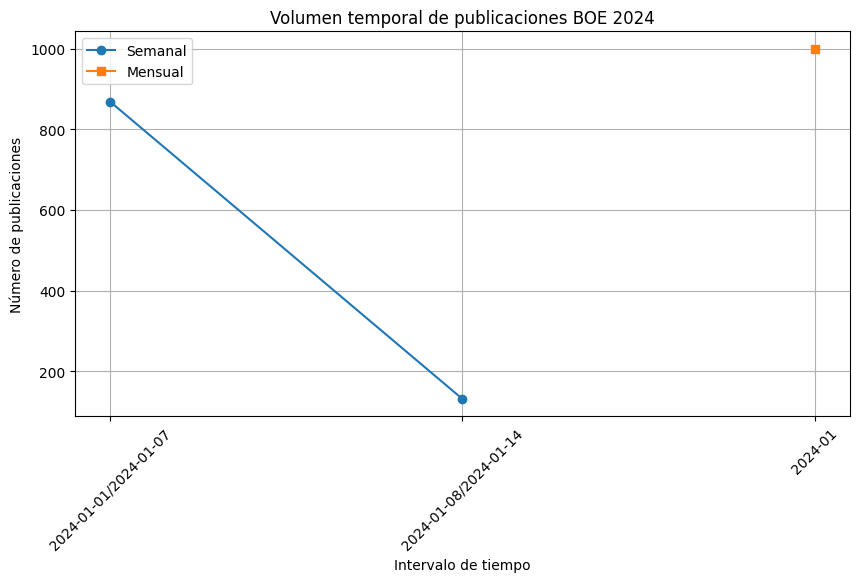

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(conteo_semana["fecha"].astype(str), conteo_semana["publicaciones"], label="Semanal", marker="o")
plt.plot(conteo_mes["fecha"].astype(str), conteo_mes["publicaciones"], label="Mensual", marker="s")
plt.legend()
plt.title("Volumen temporal de publicaciones BOE 2024")
plt.xlabel("Intervalo de tiempo")
plt.ylabel("Número de publicaciones")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Asegura datetime
df_clean["fecha"] = pd.to_datetime(df_clean["fecha"], errors="coerce")

# Semana ISO (1–53)
df_clean["semana"] = df_clean["fecha"].dt.isocalendar().week.astype(int)

conteo_semana = (
    df_clean.groupby("semana", as_index=False)["identificador"]
            .count()
            .rename(columns={"identificador": "publicaciones"})
)

# Estadísticas básicas
print(conteo_semana["publicaciones"].describe())
conteo_semana.head()



count      2.000000
mean     500.000000
std      521.844805
min      131.000000
25%      315.500000
50%      500.000000
75%      684.500000
max      869.000000
Name: publicaciones, dtype: float64


,semana,publicaciones
0,1,869
1,2,131


In [226]:
df_clean["fecha"] = pd.to_datetime(df_clean["fecha"], errors="coerce")

# Semana ISO (1–53)
df_clean["semana"] = df_clean["fecha"].dt.isocalendar().week.astype(int)

# Conteo por semana en la propia tabla (sin merge)
df_clean["conteo_semana"] = df_clean.groupby("semana")["identificador"].transform("count")

# Ordenar para revisar
df_clean = df_clean.sort_values(["semana", "fecha"]).reset_index(drop=True)

print(df_clean[["fecha", "semana", "conteo_semana"]].head(10))


       fecha  semana  conteo_semana
0 2024-01-01       1            869
1 2024-01-01       1            869
2 2024-01-01       1            869
3 2024-01-01       1            869
4 2024-01-01       1            869
5 2024-01-01       1            869
6 2024-01-01       1            869
7 2024-01-01       1            869
8 2024-01-01       1            869
9 2024-01-01       1            869


In [228]:
%pip install gensim pyarrow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [229]:
import os, numpy as np, pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# --- Cargar tokens ---
TOK_PATH = "data/processed/boe_2024_tokens_titulo_texto.parquet"
df_tok = pd.read_parquet(TOK_PATH)

TOKENS_COL = "tokens_texto"  # o "tokens_titulo"

# --- Normalizar: ndarray -> list[str], strings sueltos -> [str], NaN -> []
def to_list_of_str(x):
    if isinstance(x, list):
        return [str(t).strip() for t in x if str(t).strip()]
    if isinstance(x, np.ndarray):
        return [str(t).strip() for t in x.tolist() if str(t).strip()]
    if isinstance(x, str):
        return [x] if x.strip() else []
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return []
    try:
        return [str(t).strip() for t in list(x) if str(t).strip()]
    except Exception:
        return []

df_tok[TOKENS_COL] = df_tok[TOKENS_COL].apply(to_list_of_str)
df_tok["n_tokens"] = df_tok[TOKENS_COL].str.len()

print("Docs totales:", len(df_tok))
print("Docs con 0 tokens:", (df_tok["n_tokens"] == 0).sum())
print("Ejemplo tokens:", df_tok[TOKENS_COL].iloc[0][:10] if len(df_tok) else [])

# Quitar vacíos
df_tok = df_tok[df_tok["n_tokens"] > 0].reset_index(drop=True)
docs_tokens = df_tok[TOKENS_COL].tolist()

# --- Asegurar fecha/mes para agregados temporales ---
if not {"fecha","mes"}.issubset(df_tok.columns):
    clean = pd.read_parquet("data/boe_2024_clean.parquet")[["identificador","fecha","mes"]]
    df_tok = df_tok.merge(clean, on="identificador", how="left")

df_tok["fecha"] = pd.to_datetime(df_tok["fecha"], errors="coerce")
if "mes" not in df_tok or df_tok["mes"].isna().all():
    df_tok["mes"] = df_tok["fecha"].dt.to_period("M").astype(str)

# --- BoW sobre listas de tokens ---
vectorizer = CountVectorizer(
    analyzer=lambda x: x,   # recibe lista de tokens
    token_pattern=None,
    lowercase=False,        # ya vienen normalizados
    min_df=2,               # sube/baja según tamaño
    max_df=0.90,
    max_features=50000
)
X = vectorizer.fit_transform(docs_tokens)
vocab = np.array(vectorizer.get_feature_names_out())
print("Vocabulario:", len(vocab))

# Si quedara vacío, relaja filtros:
if len(vocab) == 0:
    vectorizer = CountVectorizer(analyzer=lambda x: x, token_pattern=None, lowercase=False,
                                 min_df=1, max_df=1.0)
    X = vectorizer.fit_transform(docs_tokens)
    vocab = np.array(vectorizer.get_feature_names_out())
    print("Vocabulario (relajado):", len(vocab))
    assert len(vocab) > 0, "Sigue vacío: revisa tokens."

# --- LDA ---
N_TOPICS, ALPHA, BETA = 12, 0.3, 0.01
lda = LatentDirichletAllocation(
    n_components=N_TOPICS,
    doc_topic_prior=ALPHA,
    topic_word_prior=BETA,
    max_iter=25,
    learning_method="online",
    evaluate_every=1,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
lda.fit(X)

# --- Top palabras por tópico ---
TOPN = 12
rows = []
for k, comp in enumerate(lda.components_):
    top_idx = comp.argsort()[::-1][:TOPN]
    rows.append({
        "topic": k,
        "top_words": ", ".join(vocab[top_idx]),
        "top_words_with_weights": "; ".join(f"{w}:{(comp[i]/comp.sum()):.3f}" for i, w in zip(top_idx, vocab[top_idx]))
    })
topics_df = pd.DataFrame(rows)

# --- Doc→tópicos (θ) + agregados por mes ---
theta = lda.transform(X)
theta_cols = [f"topic_{k}" for k in range(N_TOPICS)]
doc_topics_df = pd.DataFrame(theta, columns=theta_cols)
doc_topics_df.insert(0, "identificador", df_tok["identificador"].values)
doc_topics_df["mes"] = df_tok["mes"].values
doc_topics_df["fecha"] = df_tok["fecha"].values

topics_by_month = (
    doc_topics_df.groupby("mes")[theta_cols]
                 .mean()
                 .reset_index()
)

# --- Guardar ---
os.makedirs("data/processed", exist_ok=True)
topics_df.to_csv("data/processed/sk_lda_topics_top_words.csv", index=False)
doc_topics_df.to_parquet("data/processed/sk_lda_doc_topic_distrib.parquet", index=False)
topics_by_month.to_csv("data/processed/sk_lda_topics_by_month.csv", index=False)

print("✅ Guardado en data/processed/:")
print("  - sk_lda_topics_top_words.csv")
print("  - sk_lda_doc_topic_distrib.parquet")
print("  - sk_lda_topics_by_month.csv")


Docs totales: 1000
Docs con 0 tokens: 0
Ejemplo tokens: ['departamento', 'noviembre', 'boletín', 'oficial', 'noviembre', 'anunciar', 'cubrir', 'sistema', 'libre', 'designación']
Vocabulario: 8679
iteration: 1 of max_iter: 25, perplexity: 2347.5983
iteration: 2 of max_iter: 25, perplexity: 1747.9715
iteration: 3 of max_iter: 25, perplexity: 1469.3132
iteration: 4 of max_iter: 25, perplexity: 1309.1163
iteration: 5 of max_iter: 25, perplexity: 1211.7693
iteration: 6 of max_iter: 25, perplexity: 1151.6658
iteration: 7 of max_iter: 25, perplexity: 1113.9588
iteration: 8 of max_iter: 25, perplexity: 1089.7010
iteration: 9 of max_iter: 25, perplexity: 1073.5017
iteration: 10 of max_iter: 25, perplexity: 1062.2202
iteration: 11 of max_iter: 25, perplexity: 1054.0639
iteration: 12 of max_iter: 25, perplexity: 1047.9554
iteration: 13 of max_iter: 25, perplexity: 1043.2174
iteration: 14 of max_iter: 25, perplexity: 1039.4392
iteration: 15 of max_iter: 25, perplexity: 1036.3538
iteration: 16 of m

In [230]:
import pandas as pd

TOK_PATH = "data/processed/boe_2024_tokens_titulo_texto.parquet"
df_tok = pd.read_parquet(TOK_PATH)

print("Columnas:", list(df_tok.columns))
print("Tipos:\n", df_tok.dtypes)
print("\nMuestras crudas de tokens_texto (primeros 3):")
print(df_tok["tokens_texto"].head(3).to_list())


Columnas: ['identificador', 'titulo', 'texto_limpio', 'tokens_texto', 'tokens_titulo']
Tipos:
 identificador    string[python]
titulo           string[python]
texto_limpio             object
tokens_texto             object
tokens_titulo            object
dtype: object

Muestras crudas de tokens_texto (primeros 3):
[array(['departamento', 'noviembre', 'boletín', 'oficial', 'noviembre',
       'anunciar', 'cubrir', 'sistema', 'libre', 'designación', 'puesto',
       'trabajo', 'ministerio', 'trabajo', 'economía', 'social',
       'conformidad', 'dispuesto', '20.1.c', 'ley', '30/1984', 'agosto',
       'medida', 'reforma', 'función', 'público', 'redacción', 'ley',
       '23/1988', 'julio', 'relación', 'reglamento', 'aprobado', 'real',
       'decreto', '364/1995', 'marzo', 'acreditar', 'observancia',
       'proceso', 'cumplimiento', 'candidata', 'elegido', 'requisito',
       'especificación', 'exigido', 'idónea', 'desempeño', 'puesto',
       'asignar', 'ostentar', 'capacidad', 'compet

Sentimiento agregado

In [231]:
!pip -q install --upgrade transformers tokenizers protobuf tiktoken sentencepiece safetensors accelerate


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [232]:
%pip install -q protobuf tiktoken



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [233]:
import os
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt


In [234]:
# Tres modelos (ajústalos si quieres otros)
MODEL_NAMES = [
    "pysentimiento/robertuito-sentiment-analysis",  # ES
    "finiteautomata/beto-sentiment-analysis",       # ES
    "nlptown/bert-base-multilingual-uncased-sentiment"  # MULTI
]

# Normalización de etiquetas → estándar {NEGATIVE, NEUTRAL, POSITIVE}
LABEL_MAP = {
    "POSITIVE": "POSITIVE", "NEGATIVE": "NEGATIVE", "NEUTRAL": "NEUTRAL",
    "POS": "POSITIVE", "NEG": "NEGATIVE", "NEU": "NEUTRAL",
    "LABEL_0": "NEGATIVE", "LABEL_1": "NEUTRAL", "LABEL_2": "POSITIVE",
    "positive": "POSITIVE", "negative": "NEGATIVE", "neutral": "NEUTRAL"
}

POLARITY_NUM = {"NEGATIVE": -1, "NEUTRAL": 0, "POSITIVE": 1}

def norm_label(lbl: str) -> str:
    # robusto a mayúsculas/minúsculas
    return LABEL_MAP.get(lbl, LABEL_MAP.get(str(lbl).upper(), "NEUTRAL"))


In [235]:
device = -1  # usa 0 si tienes GPU CUDA disponible

def load_pipelines(model_names=MODEL_NAMES, device=device, batch_size=16):
    pipes = []
    for m in model_names:
        try:
            tok = AutoTokenizer.from_pretrained(m)
        except Exception:
            tok = AutoTokenizer.from_pretrained(m, use_fast=False)
        p = pipeline(
            "sentiment-analysis",
            model=AutoModelForSequenceClassification.from_pretrained(m),
            tokenizer=tok,
            device=device,
            truncation=True
        )
        p._batch_size = batch_size
        pipes.append(p)
    return pipes

pipes = load_pipelines()
print("✅ Modelos cargados:", [getattr(p.model, "name_or_path", "unknown") for p in pipes])


Device set to use cpu
Device set to use cpu
Device set to use cpu


✅ Modelos cargados: ['pysentimiento/robertuito-sentiment-analysis', 'finiteautomata/beto-sentiment-analysis', 'nlptown/bert-base-multilingual-uncased-sentiment']


In [ ]:
def get_safe_max_len(tokenizer, hard_cap=512):
    ml = getattr(tokenizer, "model_max_length", None)
    if ml is None or (isinstance(ml, int) and ml > 10000):
        return hard_cap
    return int(min(ml, hard_cap))

def _clean_text(s, max_chars=20000):
    if s is None:
        return ""
    s = str(s).replace("\x00", " ").strip()
    return s[:max_chars]


In [ ]:
def predict_sentiment_vote(
    texts,
    pipes,
    batch_size=32,
    show_progress=True,
    hard_cap=512
):
    n = len(texts)
    idxs = np.arange(n)

    final_labels = [None]*n
    votes_per_text = [[] for _ in range(n)]
    conf_table = [defaultdict(float) for _ in range(n)]

    # max_length por modelo
    per_model_maxlen = [get_safe_max_len(p.tokenizer, hard_cap=hard_cap) for p in pipes]

    rng = range(0, n, batch_size)
    if show_progress:
        rng = tqdm(rng, total=(n + batch_size - 1)//batch_size, desc="Inferencia (votación 3 modelos)")

    for start in rng:
        end = min(start + batch_size, n)
        batch_texts = [_clean_text(texts[i]) for i in idxs[start:end]]

        all_model_results = []
        for mi, p in enumerate(pipes):
            try:
                results = p(
                    batch_texts,
                    truncation=True,
                    max_length=per_model_maxlen[mi],
                    return_all_scores=True
                )
                all_model_results.append(results)
            except Exception:
                results_solo = []
                for t in batch_texts:
                    try:
                        r = p(t, truncation=True, max_length=per_model_maxlen[mi], return_all_scores=True)
                        results_solo.append(r)
                    except Exception:
                        try:
                            r = p(t, truncation=True, max_length=128, return_all_scores=True)
                            results_solo.append(r)
                        except Exception:
                            results_solo.append([{"label": "NEUTRAL", "score": 1.0}])
                all_model_results.append(results_solo)

        for bi, global_i in enumerate(idxs[start:end]):
            local_votes = []
            local_conf = defaultdict(list)

            for model_results in all_model_results:
                scores_for_text = model_results[bi]
                top = max(scores_for_text, key=lambda d: d["score"])
                top_label = norm_label(top["label"])
                local_votes.append(top_label)

                for d in scores_for_text:
                    local_conf[norm_label(d["label"])].append(float(d["score"]))

            counts = Counter(local_votes)
            most_common = counts.most_common()

            if len(most_common) == 1 or (len(most_common) > 1 and most_common[0][1] > most_common[1][1]):
                final = most_common[0][0]
            else:
                mean_conf = {k: (np.mean(v) if len(v) else 0.0) for k, v in local_conf.items()}
                final = max(mean_conf.items(), key=lambda kv: kv[1])[0]

            final_labels[global_i] = final
            votes_per_text[global_i] = local_votes
            conf_table[global_i] = {k: float(np.mean(v)) if len(v) else 0.0 for k, v in local_conf.items()}

    return final_labels, votes_per_text, conf_table


In [238]:
def analyze_sentimiento_semanal(
    df,
    text_col="texto_limpio",
    date_col="fecha",
    week_col="semana",   # tu columna 1–53
    device=device,
    batch_size=32,
    sample_rows=None
):
    # Copia mínima
    tmp = df[[date_col, text_col, week_col]].copy()
    tmp[date_col] = pd.to_datetime(tmp[date_col], errors="coerce")
    tmp = tmp.dropna(subset=[date_col, text_col, week_col]).reset_index(drop=True)

    if sample_rows:
        tmp = tmp.sample(sample_rows, random_state=42).reset_index(drop=True)

    # Inferencia (usa tu predict_sentiment_vote con top_k=None internamente)
    texts = tmp[text_col].fillna("").astype(str).tolist()
    final_labels, votes, conf_table = predict_sentiment_vote(
        texts=texts,
        pipes=pipes,
        batch_size=batch_size,
        show_progress=True
    )

    # Resultados por fila
    tmp["sentimiento"] = final_labels
    tmp["sentimiento_num"] = tmp["sentimiento"].map(POLARITY_NUM).astype(float)
    tmp["votos_modelos"] = votes

    df_fila = tmp.copy()

    # ===== Resumen semanal =====
    # Conteos por (semana, clase)
    prop_counts = (
        tmp.groupby([week_col, "sentimiento"], as_index=False)
           .size()
           .rename(columns={"size": "n_clase"})
    )

    # Totales por semana
    totals = (
        tmp.groupby(week_col, as_index=False)
           .size()
           .rename(columns={"size": "n_total"})
    )

    # Proporciones por clase
    prop = (
        prop_counts.merge(totals, on=week_col, how="left")
                   .assign(proporcion=lambda d: d["n_clase"] / d["n_total"])
                   .drop(columns=["n_clase", "n_total"])
    )

    # Polaridad media (-1, 0, 1)
    pol = (
        tmp.groupby(week_col, as_index=False)["sentimiento_num"]
           .mean()
           .rename(columns={"sentimiento_num": "polaridad_media"})
    )

    # Tabla final por semana (NEG/NEU/POS)
    tabla = (
        prop.pivot_table(index=week_col, columns="sentimiento", values="proporcion", fill_value=0)
            .reset_index()
    )
    for c in ["NEGATIVE", "NEUTRAL", "POSITIVE"]:
        if c not in tabla.columns:
            tabla[c] = 0.0

    df_semana = tabla.merge(pol, on=week_col, how="left").sort_values(week_col).reset_index(drop=True)

    return df_fila, df_semana


In [239]:
df_fila, df_semana = analyze_sentimiento_semanal(
    df_clean,
    text_col="texto_limpio",
    date_col="fecha",
    week_col="semana",
    device=device,
    batch_size=16,
    sample_rows=200
)

print("✅ df_fila (primeras filas):")
print(df_fila.head(3))

print("\n✅ df_semana (resumen por semana):")
print(df_semana.head(10))


Inferencia (votación 3 modelos):   0%|          | 0/13 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Inferencia (votación 3 modelos): 100%|██████████| 13/13 [01:21<00:00,  6.24s/it]

✅ df_fila (primeras filas):
       fecha                                       texto_limpio  semana  \
0 2024-01-04  BDNS(Identif.): De conformidad con lo previsto...       1   
1 2024-01-06  JUZGADO 1a INSTANCIA 7.- Anuncio de subasta ju...       1   
2 2024-01-06  JUZGADO 1a INSTANCIA 8.- Anuncio de subasta ju...       1   

  sentimiento  sentimiento_num                votos_modelos  
0     NEUTRAL              0.0  [NEUTRAL, NEUTRAL, NEUTRAL]  
1     NEUTRAL              0.0  [NEUTRAL, NEUTRAL, NEUTRAL]  
2     NEUTRAL              0.0  [NEUTRAL, NEUTRAL, NEUTRAL]  

✅ df_semana (resumen por semana):
   semana  NEUTRAL  NEGATIVE  POSITIVE  polaridad_media
0       1      1.0       0.0       0.0              0.0
1       2      1.0       0.0       0.0              0.0


In [240]:
# Asegurar que ambas tablas tienen la misma clave para unir
# (en este caso usamos la fecha + mes o simplemente el índice si el orden coincide)
df_clean = df_clean.reset_index(drop=True)
df_fila = df_fila.reset_index(drop=True)

# Unir columnas de sentimiento al dataset original
df_clean["sentimiento_num"] = df_fila["sentimiento_num"]


In [245]:
df_clean

,identificador,fecha,seccion_nombre,departamento_nombre,epigrafe_nombre,titulo,texto_limpio,mes,semana,conteo_semana,sentimiento_num
0,BOE-A-2024-1,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,MINISTERIO DE TRABAJO Y ECONOMÍA SOCIAL,Destinos,"Resolución de 21 de diciembre de 2023, de la S...",Por Resolución de la Subsecretaría de este Dep...,2024-01,1,869,0.0
1,BOE-A-2024-2,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 21 de diciembre de 2023, de la U...",Vistas las propuestas elevadas por las comisio...,2024-01,1,869,0.0
2,BOE-A-2024-3,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, conjunt...",Vista la propuesta elevada el 18 de diciembre ...,2024-01,1,869,0.0
3,BOE-A-2024-4,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, de la U...",De conformidad con la propuesta elevada por la...,2024-01,1,869,0.0
4,BOE-A-2024-5,2024-01-01,II. Autoridades y personal. - A. Nombramientos...,UNIVERSIDADES,Nombramientos,"Resolución de 22 de diciembre de 2023, de la U...",De conformidad con la propuesta elevada por la...,2024-01,1,869,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,BOE-A-2024-449,2024-01-09,II. Autoridades y personal. - A. Nombramientos...,MINISTERIO DE POLÍTICA TERRITORIAL Y MEMORIA D...,Ceses,"Resolución de 29 de diciembre de 2023, de la D...",En uso de las competencias que me confiere el ...,2024-01,2,131,NaN
996,BOE-A-2024-450,2024-01-09,II. Autoridades y personal. - A. Nombramientos...,"MINISTERIO DE DERECHOS SOCIALES, CONSUMO Y AGE...",Destinos,"Resolución de 22 de diciembre de 2023, de la S...",la resolución del concurso convocado por Resol...,2024-01,2,131,NaN
997,BOE-A-2024-451,2024-01-09,II. Autoridades y personal. - A. Nombramientos...,MINISTERIO PARA LA TRANSFORMACIÓN DIGITAL Y DE...,Nombramientos,"Orden TDF/1453/2023, de 29 de diciembre, por l...","de la Orden HFP/1386/2023, de 26 de diciembre ...",2024-01,2,131,NaN
998,BOE-A-2024-452,2024-01-09,II. Autoridades y personal. - A. Nombramientos...,MINISTERIO PARA LA TRANSFORMACIÓN DIGITAL Y DE...,Nombramientos,"Orden TDF/1454/2023, de 29 de diciembre, por l...","y CORRIGE errores de la Orden HFP/1387/2023, d...",2024-01,2,131,NaN


In [ ]:
out_dir = "data/outputs"
os.makedirs(out_dir, exist_ok=True)

df_fila.to_parquet(f"{out_dir}/boe_sentimiento_fila.parquet", index=False)
df_semana.to_parquet(f"{out_dir}/boe_sentimiento_semana.parquet", index=False)

print("💾 Archivos guardados en:", out_dir)


💾 Archivos guardados en: data/outputs


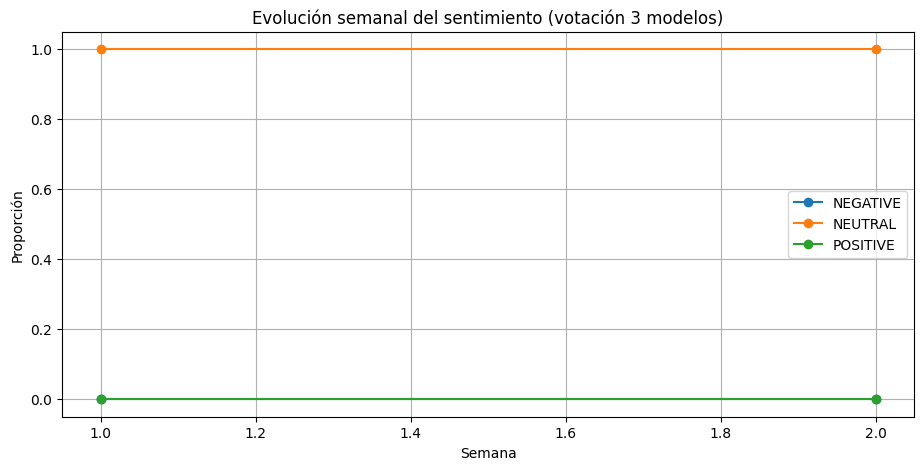

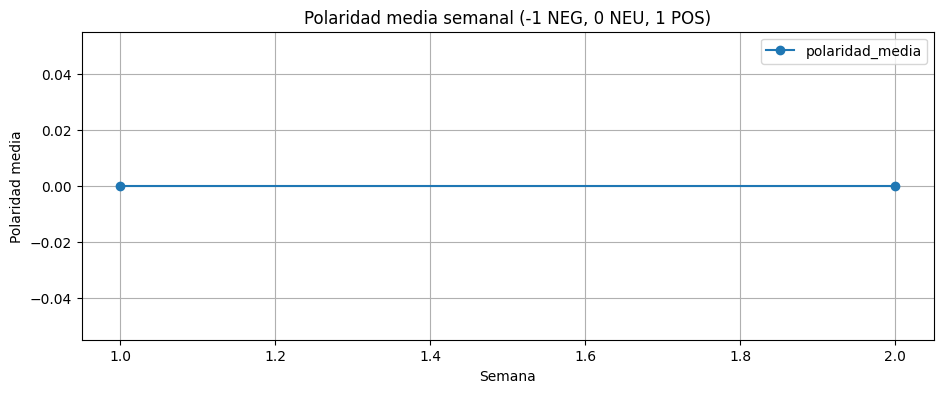

In [243]:
# Evolución semanal por clase
pivot = df_semana.set_index("semana")[["NEGATIVE", "NEUTRAL", "POSITIVE"]].sort_index()
pivot.plot(marker="o", figsize=(11,5))
plt.title("Evolución semanal del sentimiento (votación 3 modelos)")
plt.ylabel("Proporción")
plt.xlabel("Semana")
plt.grid(True)
plt.show()

# Polaridad media (-1, 0, 1)
df_semana.sort_values("semana").plot(x="semana", y="polaridad_media", marker="o", figsize=(11,4))
plt.title("Polaridad media semanal (-1 NEG, 0 NEU, 1 POS)")
plt.ylabel("Polaridad media")
plt.xlabel("Semana")
plt.grid(True)
plt.show()


In [244]:
# Asegurar formato de fecha correcto
df_fila["fecha"] = pd.to_datetime(df_fila["fecha"], errors="coerce")

# Agrupar por semana y calcular polaridad media
df_polaridad = (
    df_fila.groupby("semana", as_index=False)
           .agg(polaridad_media=("sentimiento_num", "mean"))
)

# Unir con conteo de publicaciones por semana
df_semana_polaridad = (
    conteo_semana.merge(df_polaridad, on="semana", how="left")
                 .fillna(0)
                 .sort_values("semana")
                 .reset_index(drop=True)
)

print(df_semana_polaridad)


   semana  publicaciones  polaridad_media
0       1            869              0.0
1       2            131              0.0


In [247]:
#One hot de las columnas categoricas
# Columnas a transformar
cols_to_encode = ['seccion_nombre', 'departamento_nombre', 'epigrafe_nombre']

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=cols_to_encode, prefix=cols_to_encode)

In [250]:
# Verificar resultado
print(df_encoded.head())
print(df_encoded.shape)

  identificador      fecha                                             titulo  \
0  BOE-A-2024-1 2024-01-01  Resolución de 21 de diciembre de 2023, de la S...   
1  BOE-A-2024-2 2024-01-01  Resolución de 21 de diciembre de 2023, de la U...   
2  BOE-A-2024-3 2024-01-01  Resolución de 22 de diciembre de 2023, conjunt...   
3  BOE-A-2024-4 2024-01-01  Resolución de 22 de diciembre de 2023, de la U...   
4  BOE-A-2024-5 2024-01-01  Resolución de 22 de diciembre de 2023, de la U...   

                                        texto_limpio      mes  semana  \
0  Por Resolución de la Subsecretaría de este Dep...  2024-01       1   
1  Vistas las propuestas elevadas por las comisio...  2024-01       1   
2  Vista la propuesta elevada el 18 de diciembre ...  2024-01       1   
3  De conformidad con la propuesta elevada por la...  2024-01       1   
4  De conformidad con la propuesta elevada por la...  2024-01       1   

   conteo_semana  sentimiento_num  seccion_nombre_I. Disposiciones general

In [ ]:
#Se exporta el dataset final
df_final = df_encoded.drop(columns=["identificador", "fecha", "titulo", "texto_limpio", "mes"])
df_final.to_csv("dataset_boe_temporal.csv", index=False)
